# Tick Strategy
### Team: Blue Horseshoe

In [14]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load our helper functios
import simtools as st
import tick as tk
from getstock import *
from simtools import *

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [15]:
# set up some variables
# NOTE: tickfile is a merged TAQ file!!!

tickfile = 'goog-TAQ-06152017.zip'

taq = pd.read_pickle(tickfile)

In [16]:
# filter on date
# test_day = '08/02/19'
# day = taq[test_day]


taq[taq['natbbo_ind']==4.0]


,exch,bid_px,bid_size,ask_px,ask_size,qu_cond,qu_seqnum,natbbo_ind,qu_cancel,qu_source,symbol,suffix_x,suffix_y,trade_size,trade_px
2017-06-15 09:30:00.487055346,P,946.33,2.0,950.00,5.0,R,349169.0,4.0,NaN,N,GOOG,L,NaN,NaN,NaN
2017-06-15 09:30:00.725855404,Q,932.50,1.0,934.99,1.0,R,353178.0,4.0,NaN,N,GOOG,NaN,NaN,NaN,NaN
2017-06-15 09:30:01.066044283,Q,948.88,1.0,949.22,1.0,R,359261.0,4.0,NaN,N,GOOG,L,NaN,NaN,NaN
2017-06-15 09:30:01.206868218,P,948.96,1.0,950.00,3.0,R,360617.0,4.0,NaN,N,GOOG,L,NaN,NaN,NaN
2017-06-15 09:30:01.358530011,Z,933.09,1.0,934.43,1.0,R,362519.0,4.0,NaN,N,GOOG,NaN,NaN,NaN,NaN
2017-06-15 09:30:01.495565011,P,949.11,1.0,950.00,4.0,R,363688.0,4.0,NaN,N,GOOG,L,NaN,NaN,NaN
2017-06-15 09:30:01.496103280,P,948.96,1.0,950.00,4.0,R,363689.0,4.0,NaN,N,GOOG,L,NaN,NaN,NaN
2017-06-15 09:30:01.775245579,Z,932.50,3.0,934.43,1.0,R,366067.0,4.0,NaN,N,GOOG,NaN,NaN,NaN,NaN
2017-06-15 09:30:02.017137238,Q,949.22,1.0,950.00,5.0,R,367666.0,4.0,NaN,N,GOOG,L,NaN,NaN,NaN
2017-06-15 09:30:02.167959175,Q,949.22,1.0,950.00,6.0,R,368932.0,4.0,NaN,N,GOOG,L,NaN,NaN,NaN


## 1. Implement the Tick Strategy

In [ ]:
results = tk.algo_loop( taq )

2019-11-01 02:15:50:501209: Beginning Tick Strategy run
Average stock spread for sample: 13.8752
2019-11-01 02:15:51:524538: starting main loop


In [ ]:
results

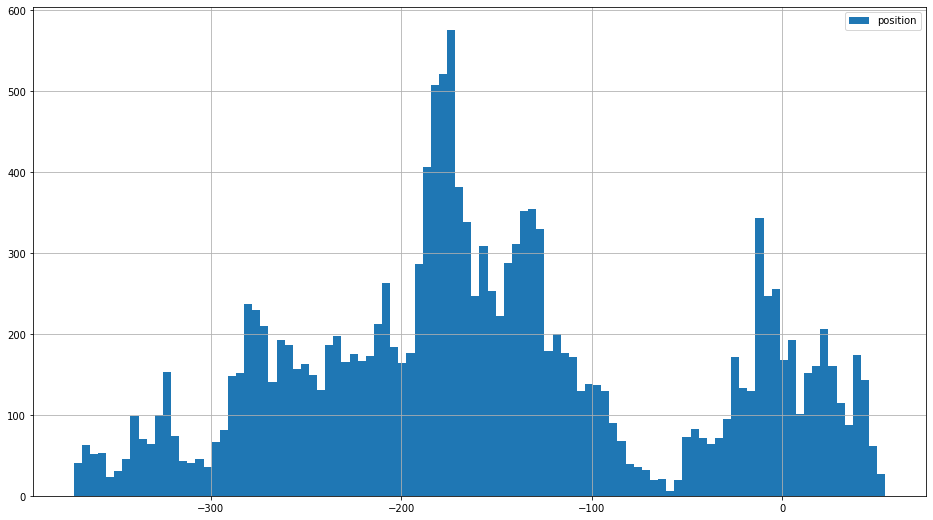

In [376]:
#results['market_price'].plot(label='market price')
#results['trade_price'].plot(label='trade price')
#results['avg_price'].plot(label='avg price')
results['position'].hist(bins=100, label='position')
plt.legend()
plt.show()

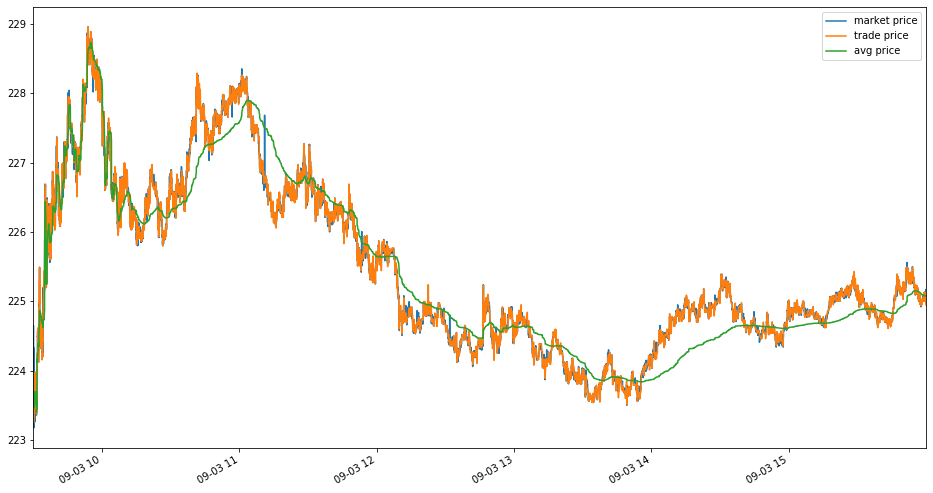

In [377]:
results['market_price'].plot(label='market price')
results['trade_price'].plot(label='trade price')
results['avg_price'].plot(label='avg price')
#results['fair_value'].plot(label='fair value')
plt.legend()
plt.show()

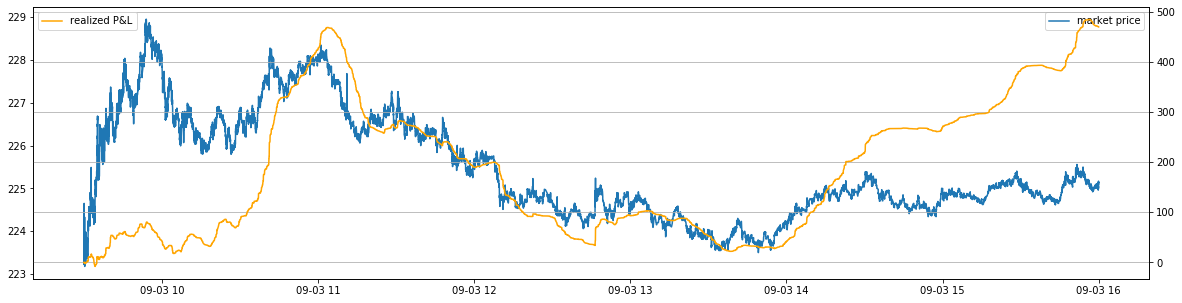

In [397]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(111)
ax1.grid(False)
ax1.plot(results['market_price'], label='market price')
ax1.legend()

ax2 = ax1.twinx()
ax2.grid(True)
ax2.plot(results['realized_pnl'], color='orange', label='realized P&L')

ax2.legend()
plt.show()

## 2. Output

In [298]:
statistical_results = tk.trade_statistics( results )

In [ ]:
# P&L Series

intraday_pnl = statistical_results['PNL']
intraday_pnl

In [ ]:
# max Long, max Short, Ending Position
# Final, Max, Min P&L

for key in list(statistical_results.keys())[1:]:
    print(key , ':' , statistical_results[key])

## 3. Explore Different Calibrations

In [1]:
taq_list=['trow-TAQ-1110.zip','trow-TAQ-0513.zip','trow-TAQ-0403.zip','tif-TAQ-11152018.zip','tif-TAQ-05102017.zip','SBUX-TAQ-0815.zip','SBUX-TAQ-0513.zip','SBUX-TAQ-0214.zip','goog-TAQ-Sep27.zip','goog-TAQ-06152017.zip','GOLD-TAQ-10092018.zip','GOLD-TAQ-262017.zip','BLK-TAQ-081117.zip','BLK-TAQ-041017.zip']
reslist=[]
window_list=[10,15,20,25,30]
tick_coef_list=

In [ ]:
for e in taq_list:
    taq = pd.read_pickle(tickfile)
    for 
    results= results = tk.algo_loop( taq )

## 4. Risk Adjustment

In [381]:
results_adj = tk.algo_loop( taq, risk_adj=1, risk_denominator=10000 )

2019-10-31 13:21:01:110519: Beginning Tick Strategy run
Average stock spread for sample: 1.0328
2019-10-31 13:21:01:508073: starting main loop
2019-10-31 13:45:23:830315: end simulation loop
2019-10-31 13:45:23:830481: order analytics
2019-10-31 13:45:23:960541: Algo run complete.


In [382]:
results_adj 

,tick,risk,fair_value,market_price,trade_price,avg_price,position,unrealized_pnl,realized_pnl,trade_shares,trade_type,trade_side
2019-09-03 09:30:01.823003996,-1,0,224.104,224,224,224,1,0,0,1,Pas,b
2019-09-03 09:30:02.306131843,-1,0.0111995,223.988,224,224,224,0,0,0,1,Agg,s
2019-09-03 09:30:02.306257436,-1,0,223.892,224,224,224,1,0,0,1,Pas,b
2019-09-03 09:30:02.306975639,-1,0.0111995,223.782,224,224,224,2,0,0,1,Pas,b
2019-09-03 09:30:02.307124181,-1,0.0223963,223.516,223.99,224,224,1,-0.02,0,1,Agg,s
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-03 15:59:58.013166600,1,0.0786032,225.049,225.15,225.11,225.045,6,0.735609,1.81948,1,Pas,s
2019-09-03 15:59:58.460928822,0,0.0674111,224.954,225.12,225.11,225.045,5,0.450522,1.88457,1,Pas,s
2019-09-03 15:59:58.460931891,-1,0.0562019,224.916,225.11,224.99,225.045,4,0.325435,1.82965,1,Agg,s
2019-09-03 15:59:59.478292637,-1,0.0449786,224.791,225.1,225.1,225.045,3,0.220348,1.88474,1,Agg,s


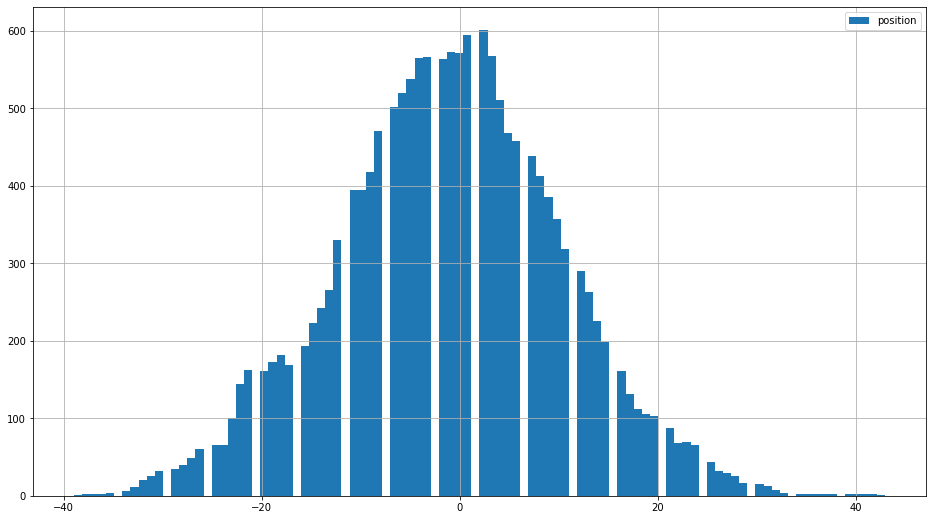

In [383]:
#results['market_price'].plot(label='market price')
#results['trade_price'].plot(label='trade price')
#results['avg_price'].plot(label='avg price')
results_adj['position'].hist(bins=100, label='position')
plt.legend()
plt.show()

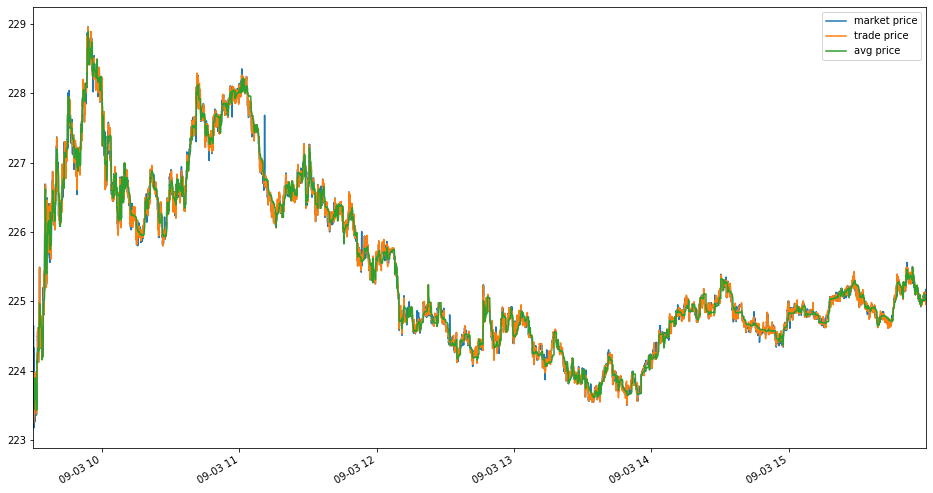

In [384]:
results_adj['market_price'].plot(label='market price')
results_adj['trade_price'].plot(label='trade price')
results_adj['avg_price'].plot(label='avg price')
#results['fair_value'].plot(label='fair value')
plt.legend()
plt.show()

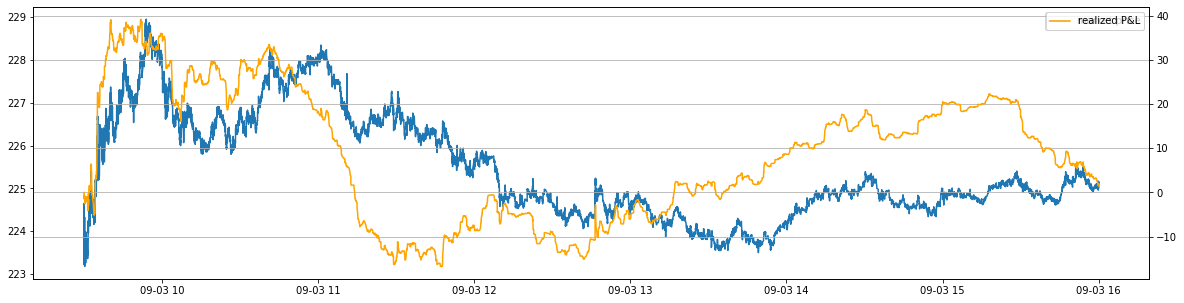

In [398]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(111)
ax1.grid(False)
ax1.plot(results_adj['market_price'], label='market price')
ax1.legend()

ax2 = ax1.twinx()
ax2.grid(True)
ax2.plot(results_adj['realized_pnl'], color='orange', label='realized P&L')

ax2.legend()
plt.show()